In [3]:
#Importing important libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [5]:
#Loading and splitting the dataset into train and test
(X_train, y_train), (X_test, y_test)= mnist.load_data()

In [33]:
!pip install emnist

  Using cached emnist-0.0-py3-none-any.whl.metadata (3.7 kB)
Using cached emnist-0.0-py3-none-any.whl (7.3 kB)


In [11]:
#Preprocessing the data
# Normalize the images
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

#Reshape for CNN input (batch_size, height, width, channels)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

#One-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [13]:
#Model building
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\Admin\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
#Training the model
history= model.fit(X_train, y_train, epochs= 10, batch_size= 128, validation_split= 0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9001 - loss: 0.3260 - val_accuracy: 0.9769 - val_loss: 0.0788
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9695 - loss: 0.1007 - val_accuracy: 0.9847 - val_loss: 0.0514
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9777 - loss: 0.0735 - val_accuracy: 0.9835 - val_loss: 0.0535
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.9822 - loss: 0.0585 - val_accuracy: 0.9893 - val_loss: 0.0390
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9845 - loss: 0.0483 - val_accuracy: 0.9899 - val_loss: 0.0369
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9874 - loss: 0.0431 - val_accuracy: 0.9900 - val_loss: 0.0355
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9887 - loss: 0.0371 - val_accuracy: 0.9903 - val_loss: 0.0346
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9900 - loss: 0.0324 - v

In [23]:
#Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9917 - loss: 0.0263
Test Accuracy: 99.17%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


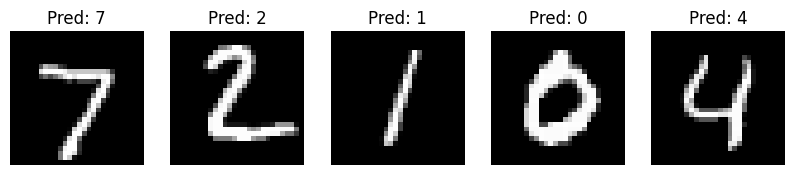

In [25]:
#Prediction
predictions = model.predict(X_test)

plt.figure(figsize=(10,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()

This is extendable to word or sentences using CRNN